# Lecture 8: More Discrete Random Variables and More Distributions 
***

In this notebook we'll get some more practice identifying and working with the Binomial, Negative Binomial, Geometric, and Poisson distributions. 

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also probably need SciPy's binom function for computing binomial coefficients as well as Python's factorial function.  

In [12]:
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd
from scipy.special import binom
from math import factorial 
%matplotlib inline

### Exercise 1 - Defective Hard Drives 
*** 

A factory manufactures sold state hard drives for Seagate Technology.  Approximately $4\%$ of hard drives that come off of a particular assembly line are defective. For each of the scenarios below: 

1. Define an appropriate random variable and distribution for the experiment. 
2. State the values that the random variable can take on. 
3. Find the probability that the random variable takes on the value $X = 3$. 
4. State any assumptions that you need to make 


**Part A**: Out of 20 drives, $k$ of them are defective. 
***
**Solution**: 

 $1$. If we define success as finding a defective drive, then we're looking for a random variable describing the number of successes in 20 trials.  This is a binomial distribution with parameters $n=20$ and $p = 0.04$.  Thus we have $X \sim Bin(20, 0.04)$. 

<p> </p> 

 $2$. The random variable $X$ can take on values of $k=0, 1, 2, \ldots, 20$. 

 $3$. If we let $p_X(k) = P(X = k)$ be the probability mass function of $Bin(20, 0.04)$ then we have 

$$
p_X(3) = {20 \choose 3} (0.04)^3~(1-0.04)^{20-3} \approx 0.036
$$

$4$. For the random variable to be Binomial we need to assume that the production of each drive is independent from the others and that the probability of a defective drive is constant at $p = 0.04$ 

***

**Part B**: The number of defective drives made that day, where the rate of defective drives per day is 10. 
***
**Solution**: 

 $1$. Given the average rate of defective drives of 10 per day, we can model the number of defective drives as a Poisson distribution.  This is a Poisson distribution with rate $\mu = 10$.  Thus we have $X \sim Pois(10)$. 

<p> </p> 

 $2$. The random variable $X$ can take on values of $k=0, 1, 2, \ldots$. 

 $3$. If we let $p_X(k) = P(X = k)$ be the probability mass function of $Pois(10)$ then we have 

$$
p_X(3) = \dfrac{10^3 ~ e^{-10}}{10!} \approx 1.12 \times 10^{-10}
$$

$4$. For the random variable to be Poisson we need to assume that the average rate of 10 defective drives per day holds and that each drive is independent. 

***

**Part C**: Upon observing the assembly line, the first defective drive is observed comes on the $k$th drive. 
***
**Solution**:  Note that we've changed the problem statement a bit to be consistent with the definitions given in class. 

 $1$. We want to know how many drives we've inspected when we find our first defective drive. This is a geometric distribution.  Since the probability of finding a defective drive is $p = 0.04$ we have have $X \sim Geo(0.04)$. 

<p> </p> 

 $2$. The random variable $X$ can take on values of $k=1, 2, \ldots$. 

 $3$. If we let $p_X(k) = P(X = k)$ be the probability mass function of $Geo(0.04)$ then we have 

$$
p_X(3) = (0.04)~(1-0.04)^{3-1} \approx 0.037
$$

$4$. For the random variable to be Geometric we need to assume that the production of each drive is independent from the others and that the probability of a defective drive is constant at $p = 0.04$ 

***

**Part D**: Upon observing the assembly line, we find our third defective drive after observing $k$ drives in all. 
***
**Solution**:  Note that we've changed the problem statement a bit to be consistent with the definitions given in class. 

 $1$. We want to know how many drives we've inspected when we find our third defective drive. This is a Negative Binomial distribution.  Since the probability of finding a defective drive is $p = 0.04$ we have have $X \sim NB(3,0.04)$. 

<p> </p> 

 $2$. The random variable $X$ can take on values of $k=3, 4, \ldots$. 

 $3$. If we let $p_X(k) = P(X = k)$ be the probability mass function of $NB(3,0.04)$ then we have 

$$
p_X(3) = {3-1 \choose 3-1}(0.04)^3~(1-0.04)^{3-3} \approx 6.4 \times 10^{-5}
$$

$4$. For the random variable to be Negative Binomial we need to assume that the production of each drive is independent from the others and that the probability of a defective drive is constant at $p = 0.04$ 

***

### Exercise 2 - Winning Concert Tickets 
*** 

You and a friend want to go to a concert, but unfortunately only one ticket is still available. The man who sells the tickets decides to toss a coin until heads appears. In each toss heads appears with probability $p$, where $0 < p < 1$, independent of each of the previous tosses. If the number of tosses needed is odd, your friend is allowed to buy the ticket; otherwise you can buy it. Would you agree to this arrangement?

**Part A**: What discrete distribution would be useful in solving this problem? 
***
**Solution**: The question asks about the number of trials necessary for the first success.  If we let $X$ be a random variable representing the number of coin flips we have to do to get our first heads, then $X$ follows a Geometric distribution with parameter $p$. 
***

**Part B**: In a minute we'll compute the approximate probability that you win the concert tickets, but before doing so, can you solve this problem by intuition (and a small amount of math)? 
***
**Solution**: The probability that your friend wins the ticket is the sum of the odd-indexed values of the probability mass function for $X$.  Recalling that the definition of this pmf is $p_X(k) = (1-p)^{k-1}p$ for $k=1, 2, \ldots$, we can write down the first several terms: 

$$
\mathbf{p},~~ (1-p)p,~~ \mathbf{(1-p)^2p},~~ (1-p)^3p,~~ \mathbf{(1-p)^4p},~~ (1-p)^5p
$$

Here the bold values are the probabilities corresponding to a favorable outcome for your friend, and the non-bold values are the probabilities corresponding to a favorable outcome for yourself.  

Consider the values in pairs.  The first two probabilities are $\mathbf{p}$ and $(1-p)p$.  Since $0 < p < 1$ the value $(1-p)$ satisfies $0 < (1-p) < 1$.  Your probability is thus smaller because it is your friend's probability multiplied by a number less than 1.  Thus, your friend is ahead in the first odd-even pair.  

We can continue on in this manner by comparing the probabilities of the next two results.  Your friend's probability is $\mathbf{(1-p)^2p}$ and yours is $(1-p)^3p$.  Again, your probability is smaller and you remain behind.  

It's easy to see that this pattern continues, and thus the probability that your friend wins the tickets is greater than yours, and it's a bad bet. 

***

**Part C**: Write a Python function that takes in the probability of heads on the coin and returns the probability mass function of the random variable described above.  Note that the random variable can take on an infinite number of values, so you'll have to decide on a reasonable number of values to go out to for your function. 
***
**Solution**: Let $n$ be the maximum number of coin flips that we'll consider.  A reasonable thing might be to choose $n$ for a given $p$ such that the last term represented in the truncated pmf is less than some tolerance $\epsilon$.  We then have 

$$
(1-p)^{n-1}p \leq \epsilon 
\quad \Rightarrow \quad 
(1-p)^{n-1} \leq 
\quad \Rightarrow \quad 
(n-1)\log(1-p) \leq \log\dfrac{\epsilon}{p}
\quad \Rightarrow \quad 
n\geq 1 + \dfrac{\log(\epsilon/p)}{\log(1-p)}
$$


In [7]:
def pmf_geo(p):
    tol = 1e-8
    n = int(1 + (np.log(tol/p)/np.log(1-p))) +1
    pmf = np.array([p*(1-p)**(kk-1) for kk in range(1,n+1)])
    return pmf 

**Part D**: Use the function you wrote in **Part C** to estimate the probabilities that your friend or you win the ticket for different values of the bias of the coin.  Use $p = 0.25$, $~p = 0.5$, and $p = 0.75$. 
***
**Solution**: 

In [8]:
pmf_25 = pmf_geo(0.25)
print("P(Friend Wins) = {:.3f} vs P(You Win) = {:.3f} for p = 0.25".format(np.sum(pmf_25[::2]), np.sum(pmf_25[1::2])))

pmf_50 = pmf_geo(0.50)
print("P(Friend Wins) = {:.3f} vs P(You Win) = {:.3f} for p = 0.50".format(np.sum(pmf_50[::2]), np.sum(pmf_50[1::2])))

pmf_75 = pmf_geo(0.75)
print("P(Friend Wins) = {:.3f} vs P(You Win) = {:.3f} for p = 0.75".format(np.sum(pmf_75[::2]), np.sum(pmf_75[1::2])))

P(Friend Wins) = 0.571 vs P(You Win) = 0.429 for p = 0.25
P(Friend Wins) = 0.667 vs P(You Win) = 0.333 for p = 0.50
P(Friend Wins) = 0.800 vs P(You Win) = 0.200 for p = 0.75


From the computation we can see that when the coin is biased towards tails your friend only has a slight edge over you in the game.  On the other hand, when the coin is very biased towards heads, your friend has a strong advantage in the game. 
***

### Exercise 3 - Implementing and Sampling the Geometric Distribution 
***

**Part A**: Write a function flips_until_heads that simulates the coin flipping scenario in **Exercise 2**. Your function should take as its sole argument the probability $p$ of flipping Heads for the coin and return the number of flips observed when you find your first Heads.  
***
**Solution**: One such implementation is as follows: 

In [9]:
def flips_until_heads(p):
    ctr = 0
    while True:
        flips = np.random.choice(np.array(["H", "T"]), p=[p, 1-p], size=50)
        head_ind = np.where(flips=="H")[0]
        if np.any(head_ind): 
            return ctr + head_ind[0] + 1
        else:
            ctr += 50

***

**Part B**: Now, run many trials of the experiment and count how many trials result in each value of the random variable.  Make a _density_ histogram of the results. 
***
**Solution**: The following function runs the simulation and produces the desired histogram.  We show the results here for $p=0.25$: 

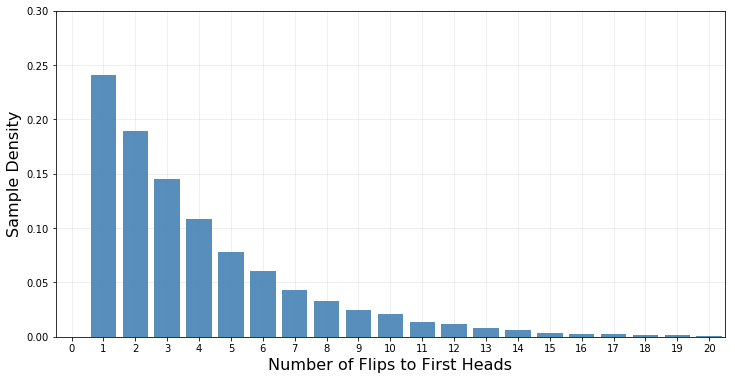

In [14]:
def flips_simulation(p=0.5, num_trials=int(1e3)):
    
    # Do many trials of the simulation 
    s = pd.Series([flips_until_heads(p) for kk in range(num_trials)])
    
    # Plot the results 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    bins = np.array(range(np.max(s.values)+1))
    s.hist(normed=True, bins=bins, ax=ax, rwidth=0.8, color="steelblue", alpha=0.9)
    
    ax.set_xlabel("Number of Flips to First Heads", fontsize=16)
    ax.set_ylabel("Sample Density", fontsize=16)
    
    plt.xticks(np.array(range(0,21))+.5, [str(ii) for ii in range(0,21)])
    
    ax.set_ylim([0,p+.05])
    ax.set_xlim([0,21])
    
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)

    
flips_simulation(p=0.25, num_trials=int(1e4))

**Part C**: Use the function you wrote in **Exercise 2** to make a bar plot of the probability mass function of $X$.  Does it look like the density histogram from **Part B**?  If not, run your simulation in **Part B** for more trials.  Does the situation improve? 
***
**Solution**: The following function produces the desired plot.  We show it here for $p = 0.25$. 

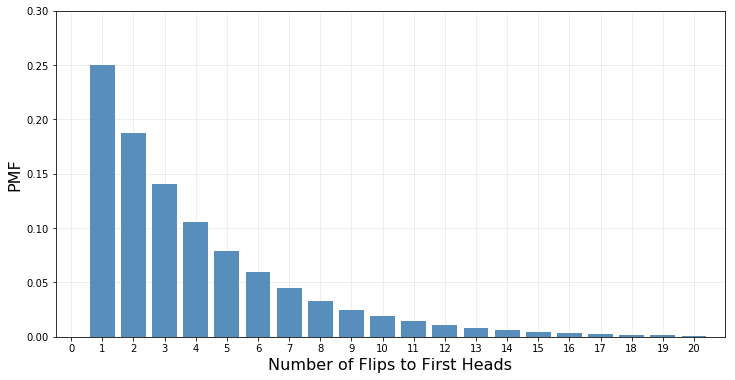

In [15]:
def flips_pmf(p=0.5, n=35):
    
    # Get the pmf from the function in Exercise 2 
    pmf = pmf_geo(p)
    pmf = pmf[:n]
    
    # Make the plot 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    ax.bar(range(1,len(pmf)+1), pmf, color="steelblue", alpha=0.9)
    
    ax.set_xlabel("Number of Flips to First Heads", fontsize=16)
    ax.set_ylabel("PMF", fontsize=16)
    
    ax.set_ylim([0,p+.05])
    ax.set_xlim([-.5,21])
    
    plt.xticks(range(0,21))
    
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
flips_pmf(p=0.25, n=20)

For completeness, lets show the plots from **Part C** and **Part D** together so we can compare. 

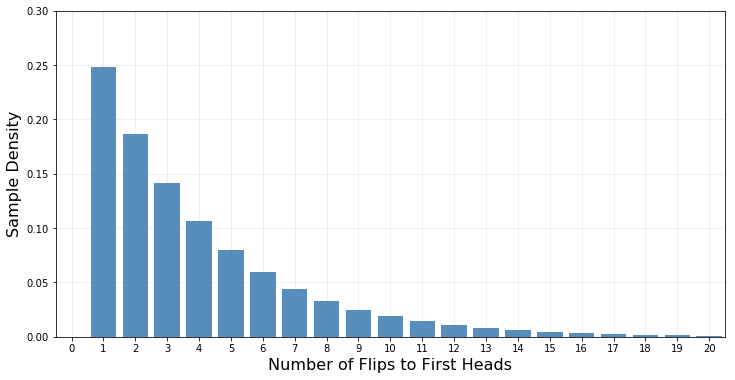

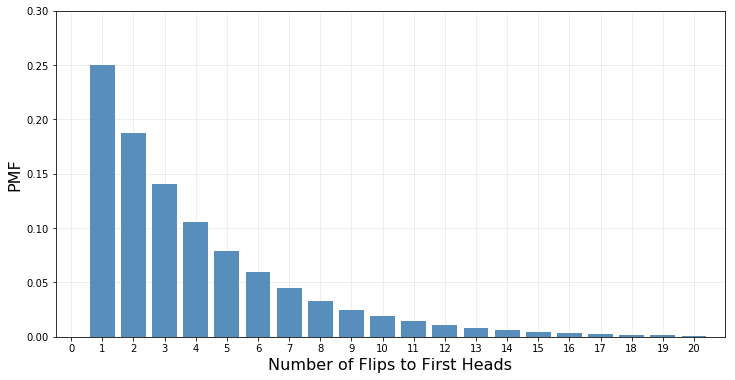

In [16]:
flips_simulation(p=0.25, num_trials=int(1e5))
flips_pmf(p=0.25, n=20)

They look pretty close! 
*** 

### Exercise 4 - Predicting Space Shuttle Disasters 
***

The space shuttle _Challenger_ disaster occurred in January 1986 when one of six O-rings failed and caused the main fuel tank to explode.  The failure of the O-ring was likely due to the low temperature at the time of the launch.  Further analysis shows that the probability of an O-ring failure as a function of temperature is given by 

$$
p(t) = \frac{e^{a+bt}}{1 + e^{a+bt}}
$$

where $a = 5.085$ and $b = -0.1156$, and $t$ is the temperature (in degrees Fahrenheit) at the time of the launch of the shuttle. At the time of the _Challenger_ launch the temperature was $t=31$, corresponding to a probability of O-ring failure of $p(31) = 0.8178$. 

**Part A**: Let $X$ be the number of failing O-rings at launch temperature $31^{\circ} F$.  Assume that the failure of each of the six O-rings is independent. What type of probability distribution does $X$ have, and what are the values of its parameters? 
***
**Solution**: Since we're after the number of failed O-rings out of a possible six, $X$ is well described by a Binomial distribution with parameters $n = 6$ and $p = 0.8178$. $X$ can take on the values $k=0,1,2,\ldots,6$.  
***

**Part B**: What is the probability $P(X \geq 1)$ that at least one O-ring fails? 
***
**Solution**: Note that the probability that at least 1 O-ring fails is equal to one minus the probability that no O-rings fail.  Thus, we have 

$$
P(X \geq 1) = 1 - P(X = 0) = 1 - (1-0.8178)^6 = 0.99996
$$
***

Let us assume that all space shuttles will be launched at $81^{\circ}F$.  With this temperature, the probability of an O-ring failure is equal to $p(81) = 0.0137$. 

**Part C**: What is the probability that during 23 launches no O-ring will fail, but that at least one O-ring will fail during the 24th launch of the space shuttle? 

***
**Solution**: There are a few different ways to do this problem.  By far the easiest is to think of each launch as an independent Bernouilli trial where $p$ is equal to the probability that at least one O-ring fails.  If we do this and then let $X$ be the random variable describing the number of launches that occur up to and including the first launch with at least one O-ring failure then $X$ will follow a Geometric distribution.  

Let $Y$ be a Binomial random variable describing the number of O-rings that fail per launch, we have that the probability of at least one O-ring failure is 

$$
P(Y \geq 1) = 1 - P(Y = 0) = 1 - (1-0.0137)^6 \approx 0.0794
$$

If we let $p = 0.0794$ be the probability of at least one O-ring failing on a particular launch, the probability that we observe the first O-ring failure on the 24th launch is 

$$
P(X = 24) = (0.0794) (1-0.0794)^{23} \approx 0.01184
$$
***

**Part D**: What is the probability that no O-ring fails during 24 launches? 
***
**Solution**: We could compute this quantity using the Geometric random variable $X$ according to 

$$
P(X > 24) = 1 - P(X \leq 24) 
$$

But computing $P(X \leq 24)$ is a lot of work.  What if we considered the random variable $Z$ representing the number of launches in the first 24 that had at least one O-ring failure? Then $Z$ would follow a Binomial distribution with parameter $p = 0.0794$. Since we want to know the probability that no failure occur, we want to know $P(Z = 0)$. We then have

$$
P(Z = 0) = {24 \choose 0} (1-0.0794)^{24} \approx0.1372
$$

***